In [1]:
name = "krish shrestha"
id = 2420252

In [2]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_06_Signals.csv


In [3]:
# Run if needed
#!pip install numpy pandas matplotlib scipy

In [4]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [5]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_06_Signals.csv', 'filename.txt']

In [6]:
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']

fs = 125      # Sample rate (Hz), samples per second
ts = 1/fs       # Sample time in seconds
t = np.arange(len(ppg))*ts

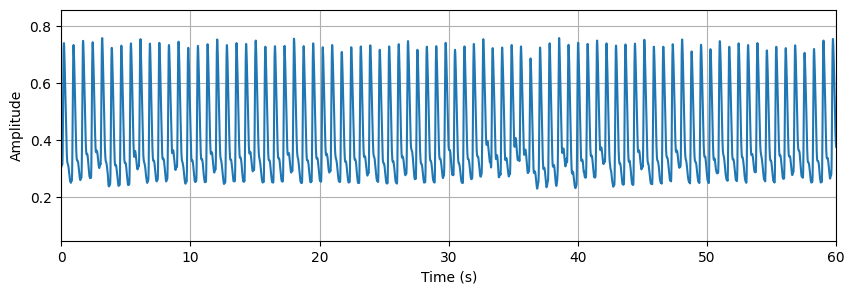

In [7]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
#plt.title(f'File: {filename}')
plt.xlim(0, ts * len(ppg))
plt.xlim(0, 60)
plt.grid()
plt.show()

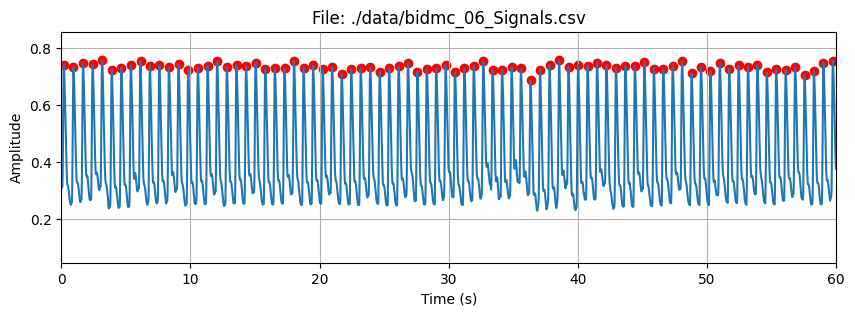

In [8]:
#using find peak method to get the list of peak from ppg data
peaks_time, peaks_height = find_peaks(ppg, height=0.5)
peaks_height = peaks_height['peak_heights'] #extract the peak amplitude from the tuple
peaks_time = peaks_time * ts    #convert the list of peaks time in order number to actual time by multiply with time period

#plot the ppg data with the peak
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.scatter(peaks_time,peaks_height,color = 'red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
#plt.xlim(0, ts * len(ppg))
plt.xlim(0, 60)
plt.grid()
plt.show()

In [9]:
PPIList = []
for i in range(len(peaks_time) - 1):
    PPIList.append(peaks_time[i+1]- peaks_time[i])
    #the average of peak to peak interval or mean PPI
mean_ppi = sum(PPIList)/len(PPIList)
print("Mean PPI in ms",  mean_ppi*1000)
#average of heart rate or mean HR
mean_hr = 60 / mean_ppi
print("Mean heart rate in BPM", mean_hr)
sdnn = (sum((PPIList - mean_ppi) ** 2) / len(PPIList)) ** 0.5
print("Standard deviation of the peak to peak interval (PPI) in ms", sdnn*1000)

sum_rmsdd = 0
for i in range(len(PPIList)-1):
    sum_rmsdd += (PPIList[i+1] - PPIList[i])**2
rmssd = (sum_rmsdd/(len(PPIList)-1))**0.5
print("Root mean square of successive differences in ms", rmssd*1000)


#The mean heart rate(hr) is in the normal range
#The mean PPi is low indicating heart rate being high
#It is indicating stress because the sdnn(Heart Rate Variability) is high
#It is indicating low parasympathetic activity
#Low SDNN indicats stress and HRV reduced and low RMSSD indicates stress and low parasympathetic work 


Mean PPI in ms 734.2725880551302
Mean heart rate in BPM 81.71352298323183
Standard deviation of the peak to peak interval (PPI) in ms 10.290979362638627
Root mean square of successive differences in ms 14.923938031913117
